# 다음 분기 게임 기획안



## 개요
- 우리 회사는 다음 분기에 출시할 게임을 설계해야 한다.
- 어떤 게임이 회사의 매출에 도움이 될 지 알아보기 위해 기존의 데이터를 가지고 시장 현황을 파악하고자 한다.

### 데이터 탐색 및 전처리

In [1]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
%cd/content/drive/MyDrive/codestates/Section1/Project1/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/codestates/Section1/Project1


In [2]:
#데이터셋 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('vgames2.csv')
df = df.iloc[:,1:] #불필요한 열('Unnamed: 0') 제거
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
#결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

-> 'Year' 결측치는 평균 값으로 대체하고, 'Genre'와 'Publisher'의 결측치는 제거하려 함.

In [4]:
#'Year'열의 데이터 보정
y = df['Year'].copy() #카피 데이터 만들어서 보정하려고 함. 현재 y는 Series

condition1 = (y >= 100)
condition2 = ((y >= 23) & (y < 100))
condition3 = ((y >= 0) & (y < 23))

y = np.where(condition1, y, 
                np.where(condition2, y + 1900, 
                         np.where(condition3, y + 2000, y))) #데이터 형식 수정 (ex. 9 -> 2009)

y = pd.DataFrame(y)
df['Year'] = y #원래 데이터에 덮어씌우기

In [5]:
df.dropna(subset=['Genre','Publisher'], inplace=True) #'Year'를 제외하고 결측치 제거

df.fillna(np.mean(df['Year']), inplace=True) #'Year' 결측치를 평균으로 대체

df = df.astype({'Year':'int'}) #'Year'의 데이터 타입을 float에서 int로 변환

이제, Sales 데이터의 M, K 형식을 수정하고 데이터 타입을 object에서 float로 변환하려 함.



(참고: https://www.skytowner.com/explore/converting_k_and_m_to_numerical_form_in_pandas_dataframe)

In [6]:
#Converting K and M to numerical form
df['NA_Sales'] = df['NA_Sales'].replace({'K':'*1e3', 'M':'*1e6'}, regex=True).map(pd.eval)
df['EU_Sales'] = df['EU_Sales'].replace({'K':'*1e3', 'M':'*1e6'}, regex=True).map(pd.eval)
df['JP_Sales'] = df['JP_Sales'].replace({'K':'*1e3', 'M':'*1e6'}, regex=True).map(pd.eval)
df['Other_Sales'] = df['Other_Sales'].replace({'K':'*1e3', 'M':'*1e6'}, regex=True).map(pd.eval)

### 시장 분석: EDA

Q1. 지역에 따라서 선호하는 게임 장르가 다를까

In [7]:
#각 지역의 장르별 출고량 합계
df_grouped_NA = pd.DataFrame(df.groupby('Genre').NA_Sales.sum(), columns=['NA_Sales'])
df_grouped_EU = pd.DataFrame(df.groupby('Genre').EU_Sales.sum(), columns=['EU_Sales'])
df_grouped_JP = pd.DataFrame(df.groupby('Genre').JP_Sales.sum(), columns=['JP_Sales'])
df_grouped_Other = pd.DataFrame(df.groupby('Genre').Other_Sales.sum(), columns=['Other_Sales'])

#각 지역의 장르별 출고량 상위 5개
df_sorted_NA = df_grouped_NA.sort_values(by='NA_Sales', ascending=False).head(5)
df_sorted_EU = df_grouped_EU.sort_values(by='EU_Sales', ascending=False).head(5)
df_sorted_JP = df_grouped_JP.sort_values(by='JP_Sales', ascending=False).head(5)
df_sorted_Other = df_grouped_Other.sort_values(by='Other_Sales', ascending=False).head(5)

In [8]:
df_sorted_NA.reset_index(inplace=True)
df_sorted_EU.reset_index(inplace=True)
df_sorted_JP.reset_index(inplace=True)
df_sorted_Other.reset_index(inplace=True)

In [9]:
import matplotlib as mpl
import warnings

#mpl.rc("font", family='AppleGothic')
# 나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# matplotlib font 설정 & boxplot
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


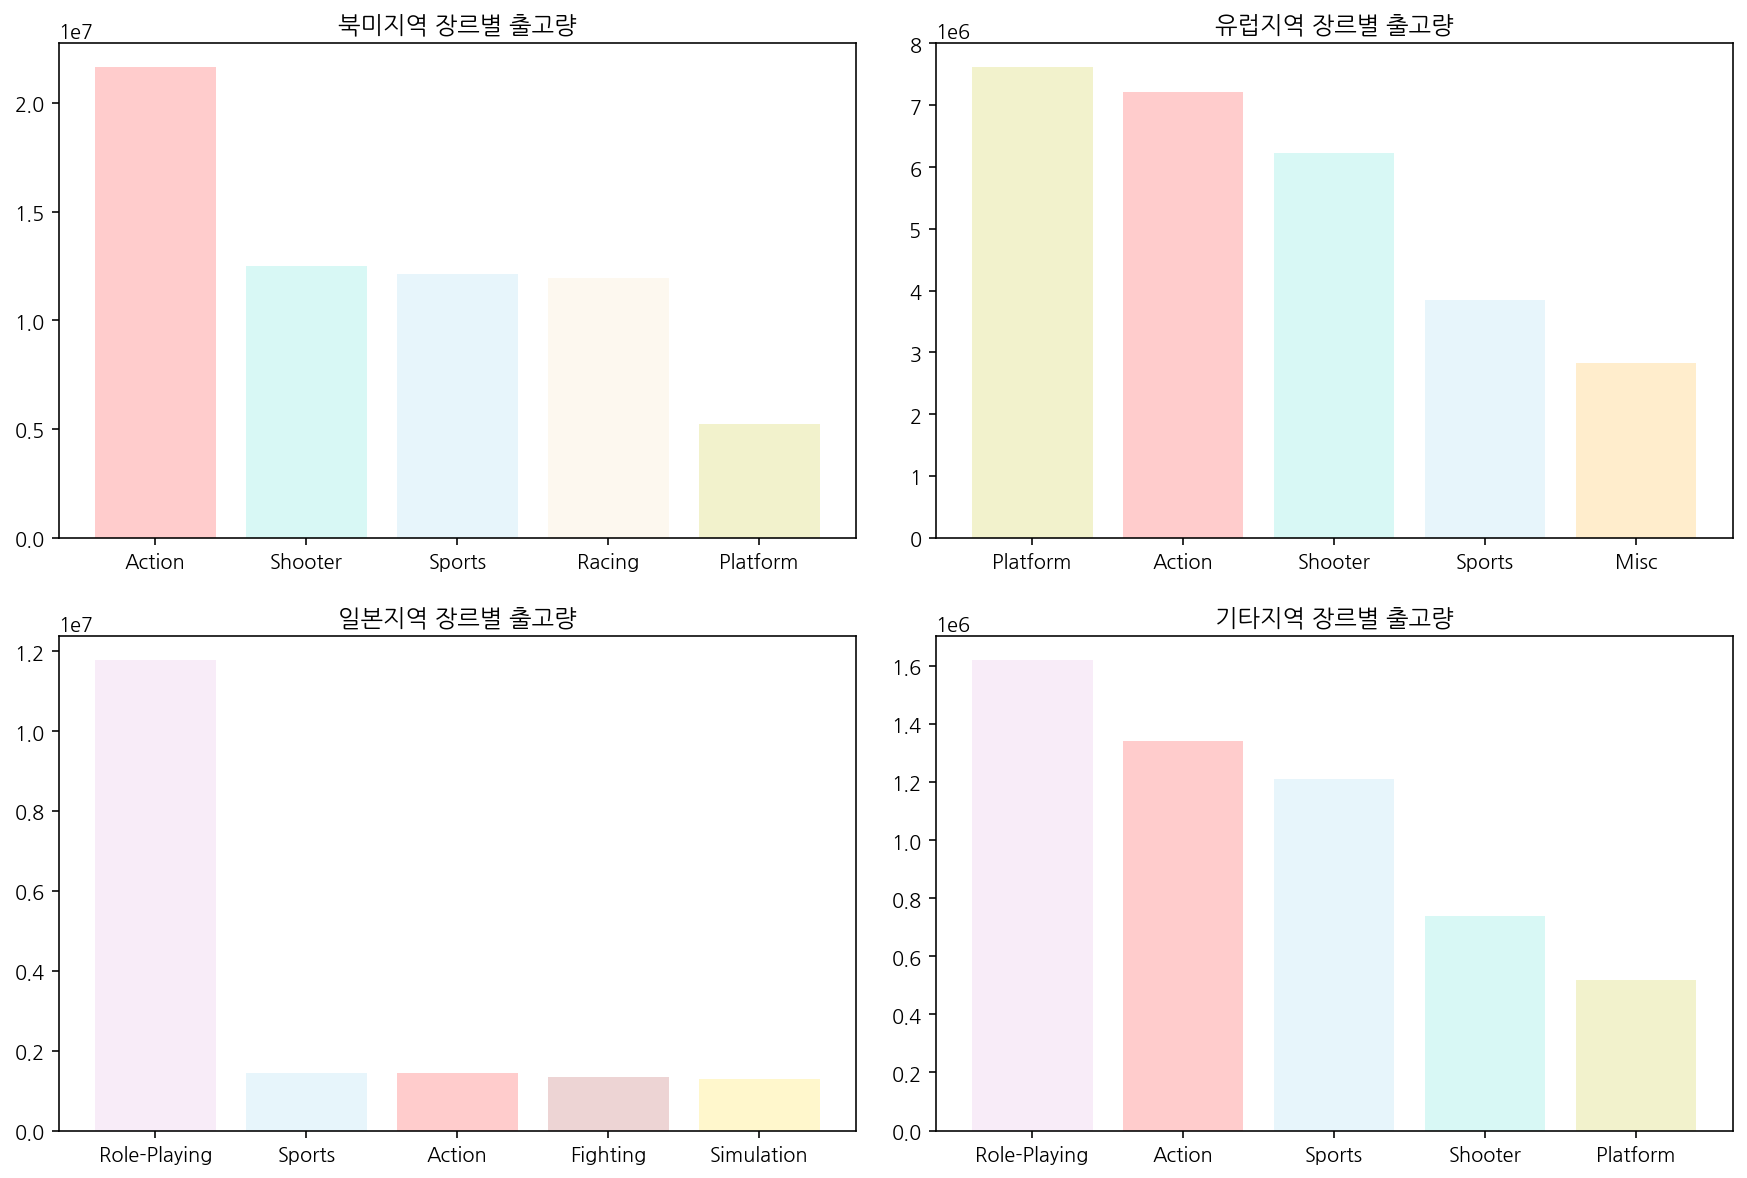

In [79]:
f, axes = plt.subplots(2,2) #2*2개의 다중 플롯 격자 생성
f.set_size_inches((15, 10)) #격자 크기 설정
plt.subplots_adjust(wspace = 0.1, hspace = 0.2) #격자 여백 설정

# [행, 열] 위치 막대 그래프
axes[0, 0].bar(df_sorted_NA['Genre'], df_sorted_NA['NA_Sales'], color = ['r', 'turquoise', 'skyblue', 'wheat', 'y'], alpha = 0.2) #[0,0] 위치 북미 막대 그래프
axes[0, 0].set_title('북미지역 장르별 출고량', fontsize = 12) #제목
axes[0, 1].bar(df_sorted_EU['Genre'], df_sorted_EU['EU_Sales'], color = ['y', 'r', 'turquoise', 'skyblue', 'orange'], alpha = 0.2) #유럽
axes[0, 1].set_title('유럽지역 장르별 출고량', fontsize = 12) #제목
axes[1, 0].bar(df_sorted_JP['Genre'], df_sorted_JP['JP_Sales'], color = ['plum', 'skyblue', 'r', 'brown', 'gold'], alpha = 0.2) #일본
axes[1, 0].set_title('일본지역 장르별 출고량', fontsize = 12) #제목
axes[1, 1].bar(df_sorted_Other['Genre'], df_sorted_Other['Other_Sales'], color = ['plum', 'r', 'skyblue', 'turquoise', 'y'], alpha = 0.2) #기타
axes[1, 1].set_title('기타지역 장르별 출고량', fontsize = 12) #제목

plt.show()

-> 위 그래프를 통해 지역별로 선호하는 게임 장르가 다름을 알 수 있다.
- 북미: Action > Shooter > Sports > Racing > Platform
- 유럽: Platform > Action > Shooter > Sports > Misc
- 일본: Role-Playing > Sports > Action > Fighting > Simulation
- 기타: Role-Playing > Action > Sports > Shooter > Platform

Q2. 연도별 게임의 트렌드가 있을까

In [11]:
#연도별로 출시된 각 장르의 게임 수
df_YG = df.groupby(['Year', 'Genre']).size() #연도별로 각 장르의 출시된 게임 수
df_YG = df_YG.unstack() #연도는 그대로 인덱스에 두고 마지막 인덱스였던 장르를 칼럼으로 변경해줌(형식: 데이터프레임)
df_YG['1st_Genre'] = df_YG.idxmax(axis=1) #각 행마다(=연도별) 가장 많이 출시된 장르를 보여주는 피쳐('1st_Genre') 생성
df_YG.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,1st_Genre
Year,,,,,,,,,,,,,
1980,1.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,Misc
1981,25.0,NaN,NaN,NaN,3.0,2.0,1.0,NaN,10.0,1.0,4.0,NaN,Action
1982,18.0,NaN,NaN,1.0,5.0,3.0,2.0,NaN,5.0,NaN,2.0,NaN,Action
1983,7.0,1.0,NaN,1.0,5.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,Action
1984,1.0,NaN,NaN,1.0,1.0,3.0,3.0,NaN,3.0,NaN,2.0,NaN,Puzzle


In [12]:
df_YG_80s = pd.DataFrame(df_YG.iloc[0:9,-1])
YG_80s = df_YG_80s.groupby('1st_Genre').size().idxmax() #80년대 가장 많이 출시된 장르
df_YG_90s = pd.DataFrame(df_YG.iloc[10:19,-1])
YG_90s = df_YG_90s.groupby('1st_Genre').size().idxmax() #90년대 가장 많이 출시된 장르
df_YG_00s = pd.DataFrame(df_YG.iloc[20:29,-1])
YG_00s = df_YG_00s.groupby('1st_Genre').size().idxmax() #2000년대 가장 많이 출시된 장르
df_YG_10s = pd.DataFrame(df_YG.iloc[30:37,-1])
YG_10s = df_YG_10s.groupby('1st_Genre').size().idxmax() #10년대 가장 많이 출시된 장르
YG_20s = df_YG.iloc[38,-1]

print('<기간별 가장 많이 출시된 장르>', '\n',
      '1980년대:', YG_80s, '\n',
      '1990년대:', YG_90s, '\n',
      '2000년대:', YG_00s, '\n',
      '2010년대:', YG_10s, '\n',
      '2020년대:', YG_20s)

<기간별 가장 많이 출시된 장르> 
 1980년대: Action 
 1990년대: Fighting 
 2000년대: Action 
 2010년대: Action 
 2020년대: Simulation


In [13]:
y80s = df_YG_80s.groupby('1st_Genre').size()
y90s = df_YG_90s.groupby('1st_Genre').size()
y00s = df_YG_00s.groupby('1st_Genre').size()
y10s = df_YG_10s.groupby('1st_Genre').size()

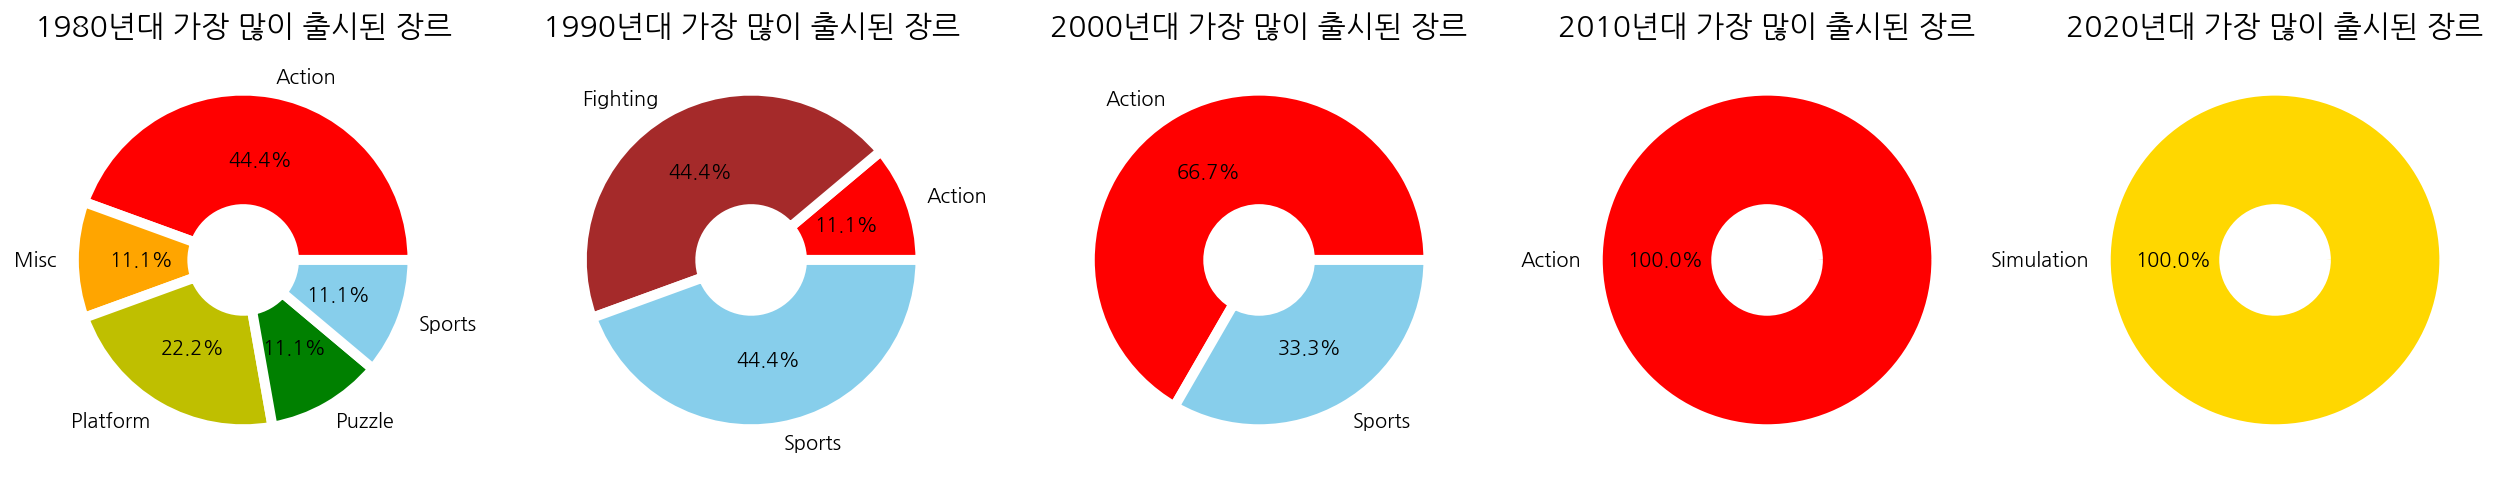

In [14]:
#시각화(파이 차트)
plt.figure(figsize=(22,11))

plt.subplot(151)
ratio = [y80s[0]/len(y80s)*100, y80s[1]/len(y80s)*100, y80s[2]/len(y80s)*100, y80s[3]/len(y80s)*100, y80s[4]/len(y80s)*100]
labels = ['Action', 'Misc', 'Platform', 'Puzzle', 'Sports']
colors = ['r', 'orange', 'y', 'g', 'skyblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('1980년대 가장 많이 출시된 장르', size = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)

plt.subplot(152)
ratio = [y90s[0]/len(y90s)*100, y90s[1]/len(y90s)*100, y90s[2]/len(y90s)*100]
labels = ['Action', 'Fighting', 'Sports']
colors = ['r', 'brown', 'skyblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('1990년대 가장 많이 출시된 장르', size = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)

plt.subplot(153)
ratio = [y00s[0]/len(y00s)*100, y00s[1]/len(y00s)*100]
labels = ['Action', 'Sports']
colors = ['r', 'skyblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('2000년대 가장 많이 출시된 장르', size = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)

plt.subplot(154)
ratio = [y10s[0]/len(y10s)*100]
labels = ['Action']
colors = ['r']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('2010년대 가장 많이 출시된 장르', size = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)

plt.subplot(155)
ratio = [100]
labels = ['Simulation']
colors = ['gold']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('2020년대 가장 많이 출시된 장르', size = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)

plt.show()

In [15]:
#연도별로 장르별 전체 지역 출고량 합계
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] #전체 지역 출고량 feature 생성
df_YGT = df.groupby(['Year','Genre']).Total_Sales.sum()
df_YGT = df_YGT.unstack()
df_YGT['1st_Sales_Genre'] = df_YGT.idxmax(axis=1)
df_YGT.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,1st_Sales_Genre
Year,,,,,,,,,,,,,
1980,0.34,NaN,0.77,2.70,NaN,NaN,NaN,NaN,7.07,NaN,NaN,NaN,Shooter
1981,110014.68,NaN,NaN,NaN,6.92,2.25,0.48,NaN,10.02,0.44,0.78,NaN,Action
1982,6.50,NaN,NaN,0.87,5.03,10.04,1.57,NaN,3.81,NaN,1.06,NaN,Puzzle
1983,2.86,0.4,NaN,2.14,6.93,0.78,NaN,NaN,0.49,NaN,3.20,NaN,Platform
1984,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.17,NaN,Shooter


In [16]:
df_YGT_80s = pd.DataFrame(df_YGT.iloc[0:9,-1])
YGT_80s = df_YGT_80s.groupby('1st_Sales_Genre').size().idxmax() #80년대 가장 많이 판매된 장르
df_YGT_90s = pd.DataFrame(df_YGT.iloc[10:19,-1])
YGT_90s = df_YGT_90s.groupby('1st_Sales_Genre').size().idxmax() #90년대 가장 많이 판매된 장르
df_YGT_00s = pd.DataFrame(df_YGT.iloc[20:29,-1])
YGT_00s = df_YGT_00s.groupby('1st_Sales_Genre').size().idxmax() #2000년대 가장 많이 판매된 장르
df_YGT_10s = pd.DataFrame(df_YGT.iloc[30:37,-1])
YGT_10s = df_YGT_10s.groupby('1st_Sales_Genre').size().idxmax() #10년대 가장 많이 판매된 장르
YGT_20s = df_YGT.iloc[38,-1]

print('<기간별 가장 많이 판매된 장르>', '\n',
      '1980년대:', YGT_80s, '\n',
      '1990년대:', YGT_90s, '\n',
      '2000년대:', YGT_00s, '\n',
      '2010년대:', YGT_10s, '\n',
      '2020년대:', YGT_20s)

<기간별 가장 많이 판매된 장르> 
 1980년대: Platform 
 1990년대: Fighting 
 2000년대: Action 
 2010년대: Shooter 
 2020년대: Simulation


In [17]:
ys80s = df_YGT_80s.groupby('1st_Sales_Genre').size()
ys90s = df_YGT_90s.groupby('1st_Sales_Genre').size()
ys00s = df_YGT_00s.groupby('1st_Sales_Genre').size()
ys10s = df_YGT_10s.groupby('1st_Sales_Genre').size()

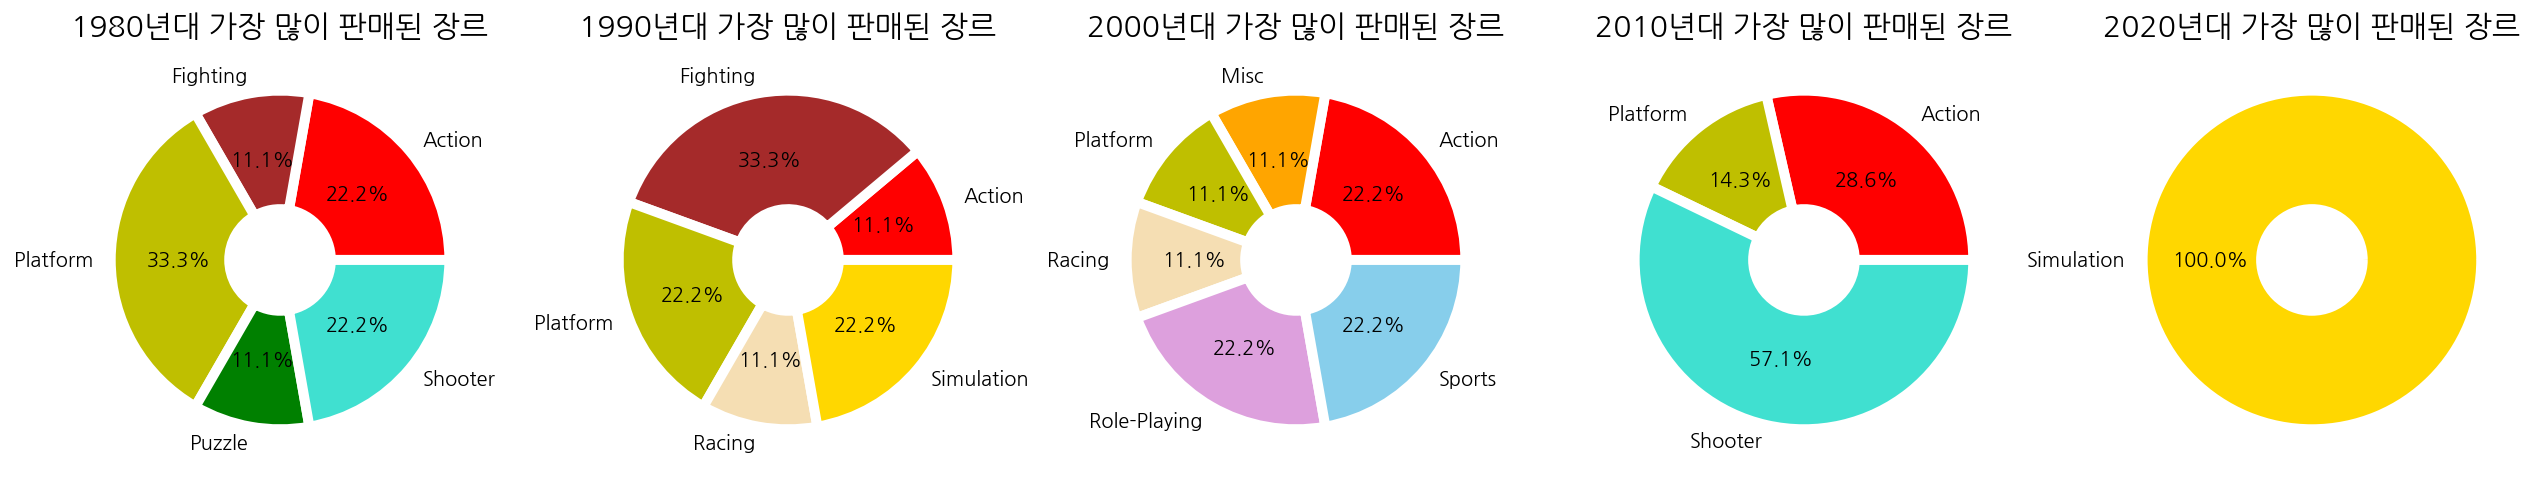

In [18]:
#시각화(파이 차트)
plt.figure(figsize=(22,11))

plt.subplot(151)
ratio = [ys80s[0]/len(ys80s)*100, ys80s[1]/len(ys80s)*100, ys80s[2]/len(ys80s)*100, ys80s[3]/len(ys80s)*100, ys80s[4]/len(ys80s)*100]
labels = ['Action', 'Fighting', 'Platform', 'Puzzle', 'Shooter']
colors = ['r', 'brown', 'y', 'g', 'turquoise']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('1980년대 가장 많이 판매된 장르', size = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)

plt.subplot(152)
ratio = [ys90s[0]/len(ys90s)*100, ys90s[1]/len(ys90s)*100, ys90s[2]/len(ys90s)*100, ys90s[3]/len(ys90s)*100, ys90s[4]/len(ys90s)*100]
labels = ['Action', 'Fighting', 'Platform', 'Racing', 'Simulation']
colors = ['r', 'brown', 'y', 'wheat', 'gold']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('1990년대 가장 많이 판매된 장르', size = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)

plt.subplot(153)
ratio = [ys00s[0]/len(ys00s)*100, ys00s[1]/len(ys00s)*100, ys00s[2]/len(ys00s)*100, ys00s[3]/len(ys00s)*100, ys00s[4]/len(ys00s)*100, ys00s[5]/len(ys00s)*100]
labels = ['Action', 'Misc', 'Platform', 'Racing', 'Role-Playing', 'Sports']
colors = ['r', 'orange', 'y', 'wheat', 'plum', 'skyblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('2000년대 가장 많이 판매된 장르', size = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)

plt.subplot(154)
ratio = [ys10s[0]/len(ys10s)*100, ys10s[1]/len(ys10s)*100, ys10s[2]/len(ys10s)*100]
labels = ['Action', 'Platform', 'Shooter']
colors = ['r', 'y', 'turquoise']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('2010년대 가장 많이 판매된 장르', size = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)

plt.subplot(155)
ratio = [100]
labels = ['Simulation']
colors = ['gold']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('2020년대 가장 많이 판매된 장르', size = 15)
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)

plt.show()

-> 위 그래프들을 통해 연도별로 회사가 가장 많이 출시한 게임의 장르와 실제 가장 높은 판매량을 기록한 장르가 다름을 알 수 있다.


*즉*, 회사가 분석한 트렌드와 실제 소비자들 사이의 트렌드는 다를 수 있다.

Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [19]:
df_sales10 = df.sort_values(by='Total_Sales', ascending=False).head(10) #전체 지역에서의 출고량을 기준으로 상위 10개의 게임
df_sales10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.00,5.31,0.06,1.38,9630006.75
12600,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030000.00,1.98,0.08,0.78,7030002.84
577,Mario Kart 64,N64,1996,Racing,Nintendo,5550000.00,1.94,2.23,0.15,5550004.32
1964,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100000.00,1.89,1.45,0.16,4100003.50
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3150000.00,0.35,3150007.34
8533,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3120000.00,0.59,3120011.52
9829,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930000.00,1.25,0.83,0.20,2930002.28
7865,FIFA 14,X360,2013,Sports,Electronic Arts,0.92,2930000.00,0.01,0.46,2930001.39
6458,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2850000.00,1.91,0.23,2850009.05
3589,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,2780000.00,0.14,2780002.53


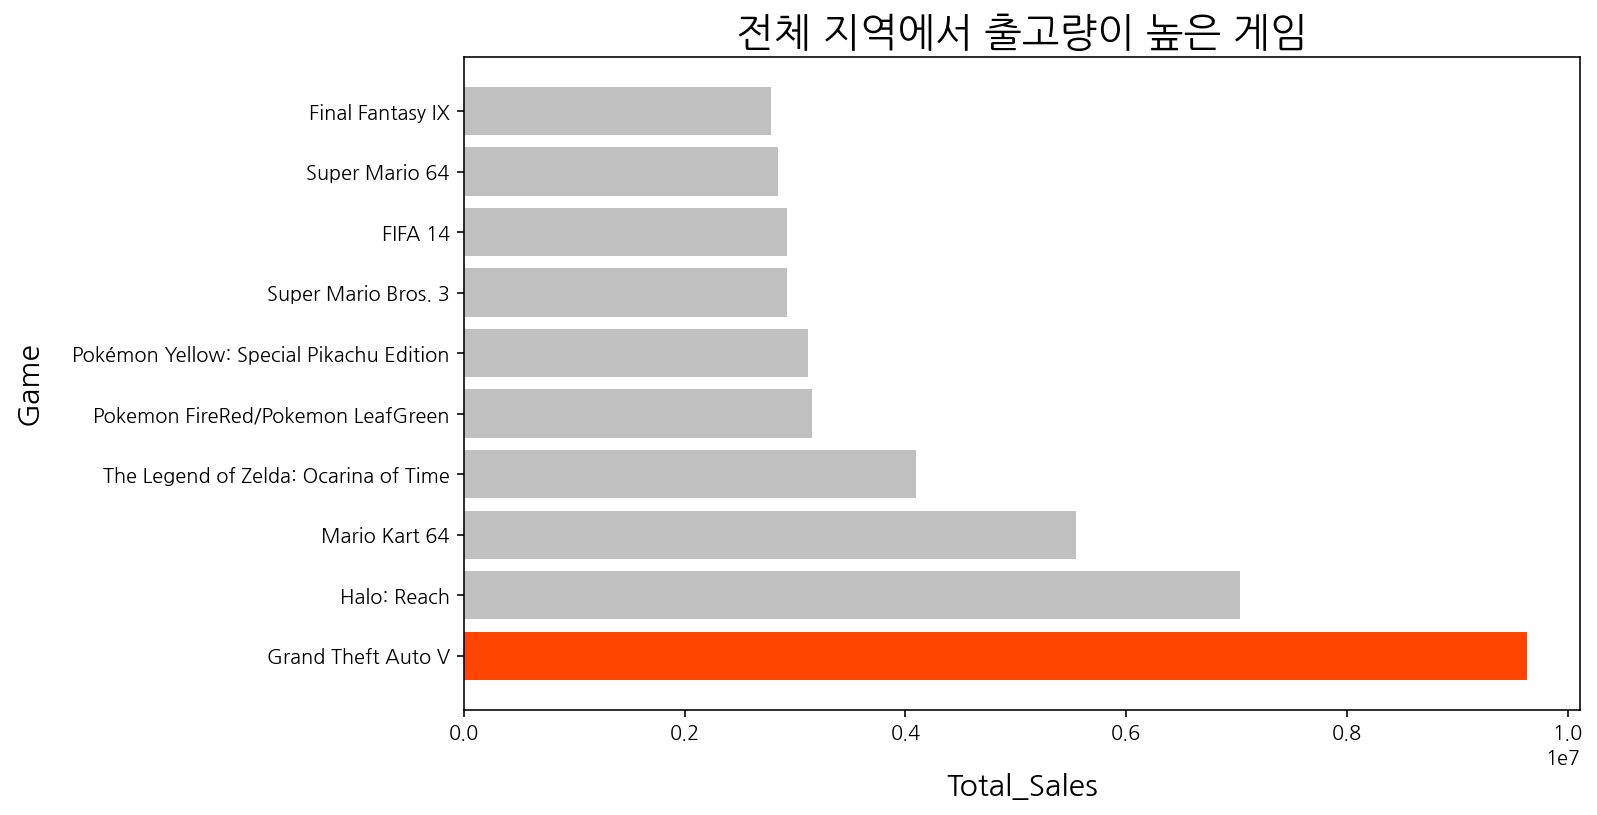

In [76]:
xs = df_sales10['Name'].to_list() #x축이 될 'Name'을 리스트로 저장
ys = df_sales10['Total_Sales'].to_list() #y축이 될 'Total_Sales'를 리스트로 저장
plt.figure(figsize=(10, 6)) #그래프 크기 지정
plt.xlabel('Total_Sales', labelpad=15, fontsize=15) #그래프 x축 이름(label) 지정
plt.ylabel('Game', labelpad=15, fontsize=15) #그래프 y축 이름(label) 지정
plt.barh(xs, ys, color=['orangered', 'silver', 'silver','silver','silver','silver','silver','silver','silver','silver']) #리스트로 저장한 xs와 ys로 막대(barh) 그래프 플롯
#plt.bar(xs, ys, width=0.6, color='skyblue')
#plt.xticks(rotation=90, fontsize=14)
plt.title('전체 지역에서 출고량이 높은 게임', fontsize=20)
plt.show()

-> 전체 지역을 통틀어 가장 많이 팔린 게임은 아래와 같다.
1. Grand Theft Auto V
2. Halo: Reach
3. Mario Kart 64
4. The Legend of Zelda: Ocarina of Time
5. Pokemon FireRed/Pokemon LeafGreen
6. Pokemon Yellow: Special Pikachu Edition
7. Super Mario Bros. 3
8. FIFA 14
9. Super Mario 64
10. Final Fantasy IX

Q4. 최근 10년간 가장 많이 팔린 게임은?

In [33]:
data = pd.DataFrame(df.groupby(['Year','Name','Genre']).Total_Sales.sum()).sort_values(by='Total_Sales', ascending=False)
data = data.reset_index()
con = ((data['Year'] >= 2010) & (data['Year'] <= 2019))
data = data[con].head(10)
data

,Year,Name,Genre,Total_Sales
0,2013,Grand Theft Auto V,Action,9630028.14
1,2010,Halo: Reach,Shooter,7030002.84
6,2013,FIFA 14,Sports,2990014.17
12,2012,Assassin's Creed III,Action,2560010.54
14,2011,Battlefield 3,Shooter,2130015.24
16,2013,Call of Duty: Ghosts,Shooter,1780025.59
17,2011,NBA 2K12,Sports,1610003.91
19,2014,Call of Duty: Advanced Warfare,Shooter,1530020.36
21,2016,Uncharted 4: A Thief's End,Shooter,1300002.90
25,2013,Forza Motorsport 5,Racing,1210000.96


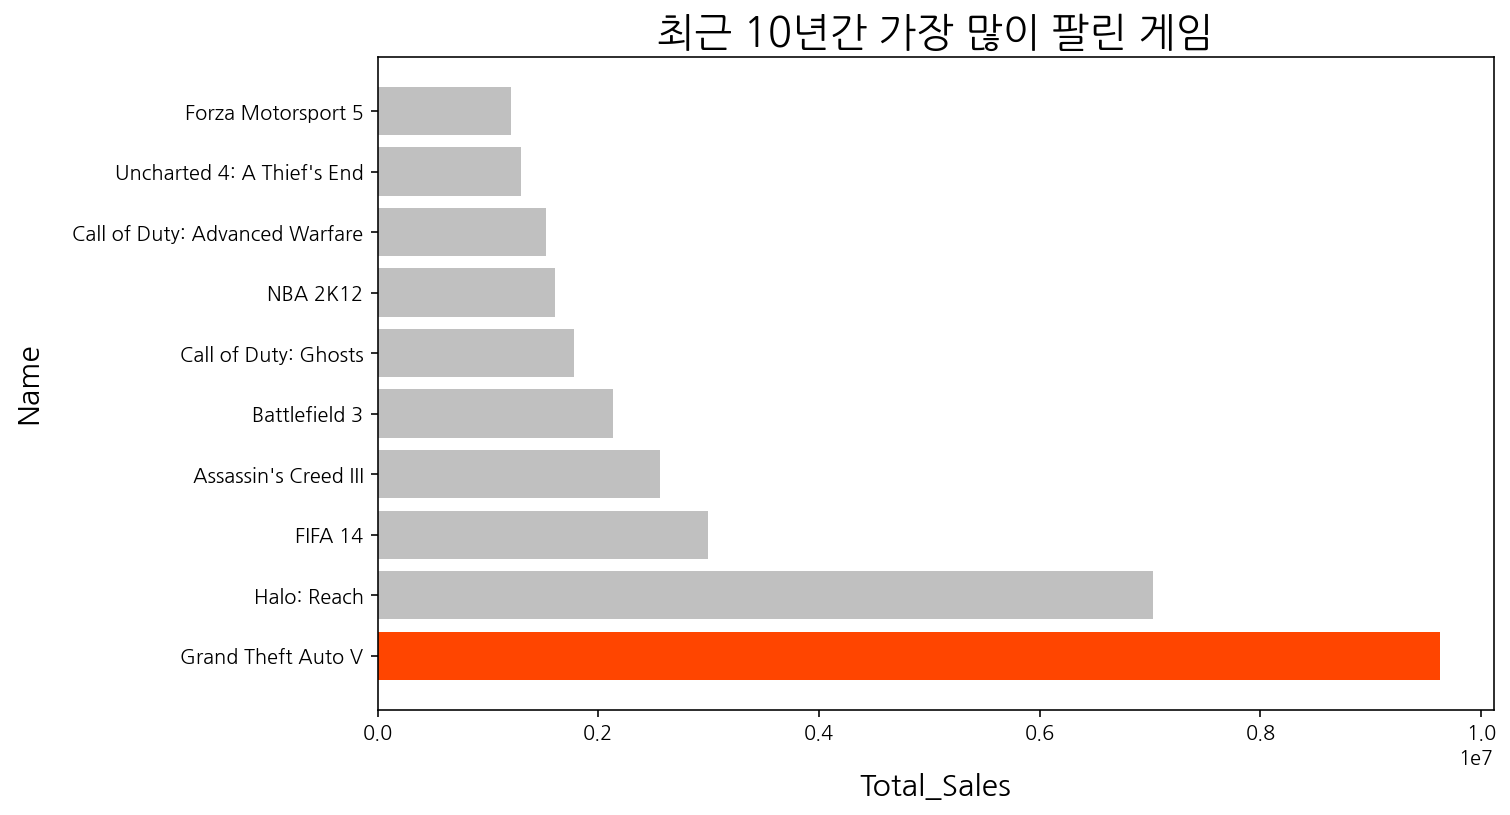

In [77]:
xs = data['Name'].to_list() #x축이 될 'Name'을 리스트로 저장
ys = data['Total_Sales'].to_list() #y축이 될 'Total_Sales'를 리스트로 저장
plt.figure(figsize=(10, 6)) #그래프 크기 지정
plt.xlabel('Total_Sales', labelpad=15, fontsize=15) #그래프 x축 이름(label) 지정
plt.ylabel('Name', labelpad=15, fontsize=15) #그래프 y축 이름(label) 지정
plt.barh(xs, ys, color=['orangered', 'silver', 'silver','silver','silver','silver','silver','silver','silver','silver']) #리스트로 저장한 xs와 ys로 막대(barh) 그래프 플롯
#plt.bar(xs, ys, width=0.6, color='skyblue')
#plt.xticks(rotation=90, fontsize=14)
plt.title('최근 10년간 가장 많이 팔린 게임', fontsize=20)
plt.show()

-> 최근 10년간 가장 많이 팔린 게임은 다음과 같다.
1. Grand Theft Auto V
2. Halo: Reach
3. FIFA 14
4. Assassin's Creed III
5. Battlefield 3
6. Call of Duty: Ghosts
7. NBA 2K12
8. Call of Duty: Advanced Warfare
9. Uncharted 4: A Thief's End
10. Forza Motorsport 5

Q5. 지역별로 선호하는 플랫폼이 있는가?

In [58]:
df_PN = df.groupby('Platform').NA_Sales.sum()
df_PE = df.groupby('Platform').EU_Sales.sum()
df_PJ = df.groupby('Platform').JP_Sales.sum()
df_PO = df.groupby('Platform').Other_Sales.sum()
df_PT = df.groupby('Platform').Total_Sales.sum()
df_P = pd.concat([df_PN, df_PE, df_PJ, df_PO, df_PT], axis=1)
df_p10_NA = df_P.sort_values(by='NA_Sales', ascending=False).head(10)
df_p10_NA = df_p10_NA.reset_index()
df_p10_EU = df_P.sort_values(by='EU_Sales', ascending=False).head(10)
df_p10_EU = df_p10_EU.reset_index()
df_p10_JP = df_P.sort_values(by='JP_Sales', ascending=False).head(10)
df_p10_JP = df_p10_JP.reset_index()
df_p10_Other = df_P.sort_values(by='Other_Sales', ascending=False).head(10)
df_p10_Other = df_p10_Other.reset_index()

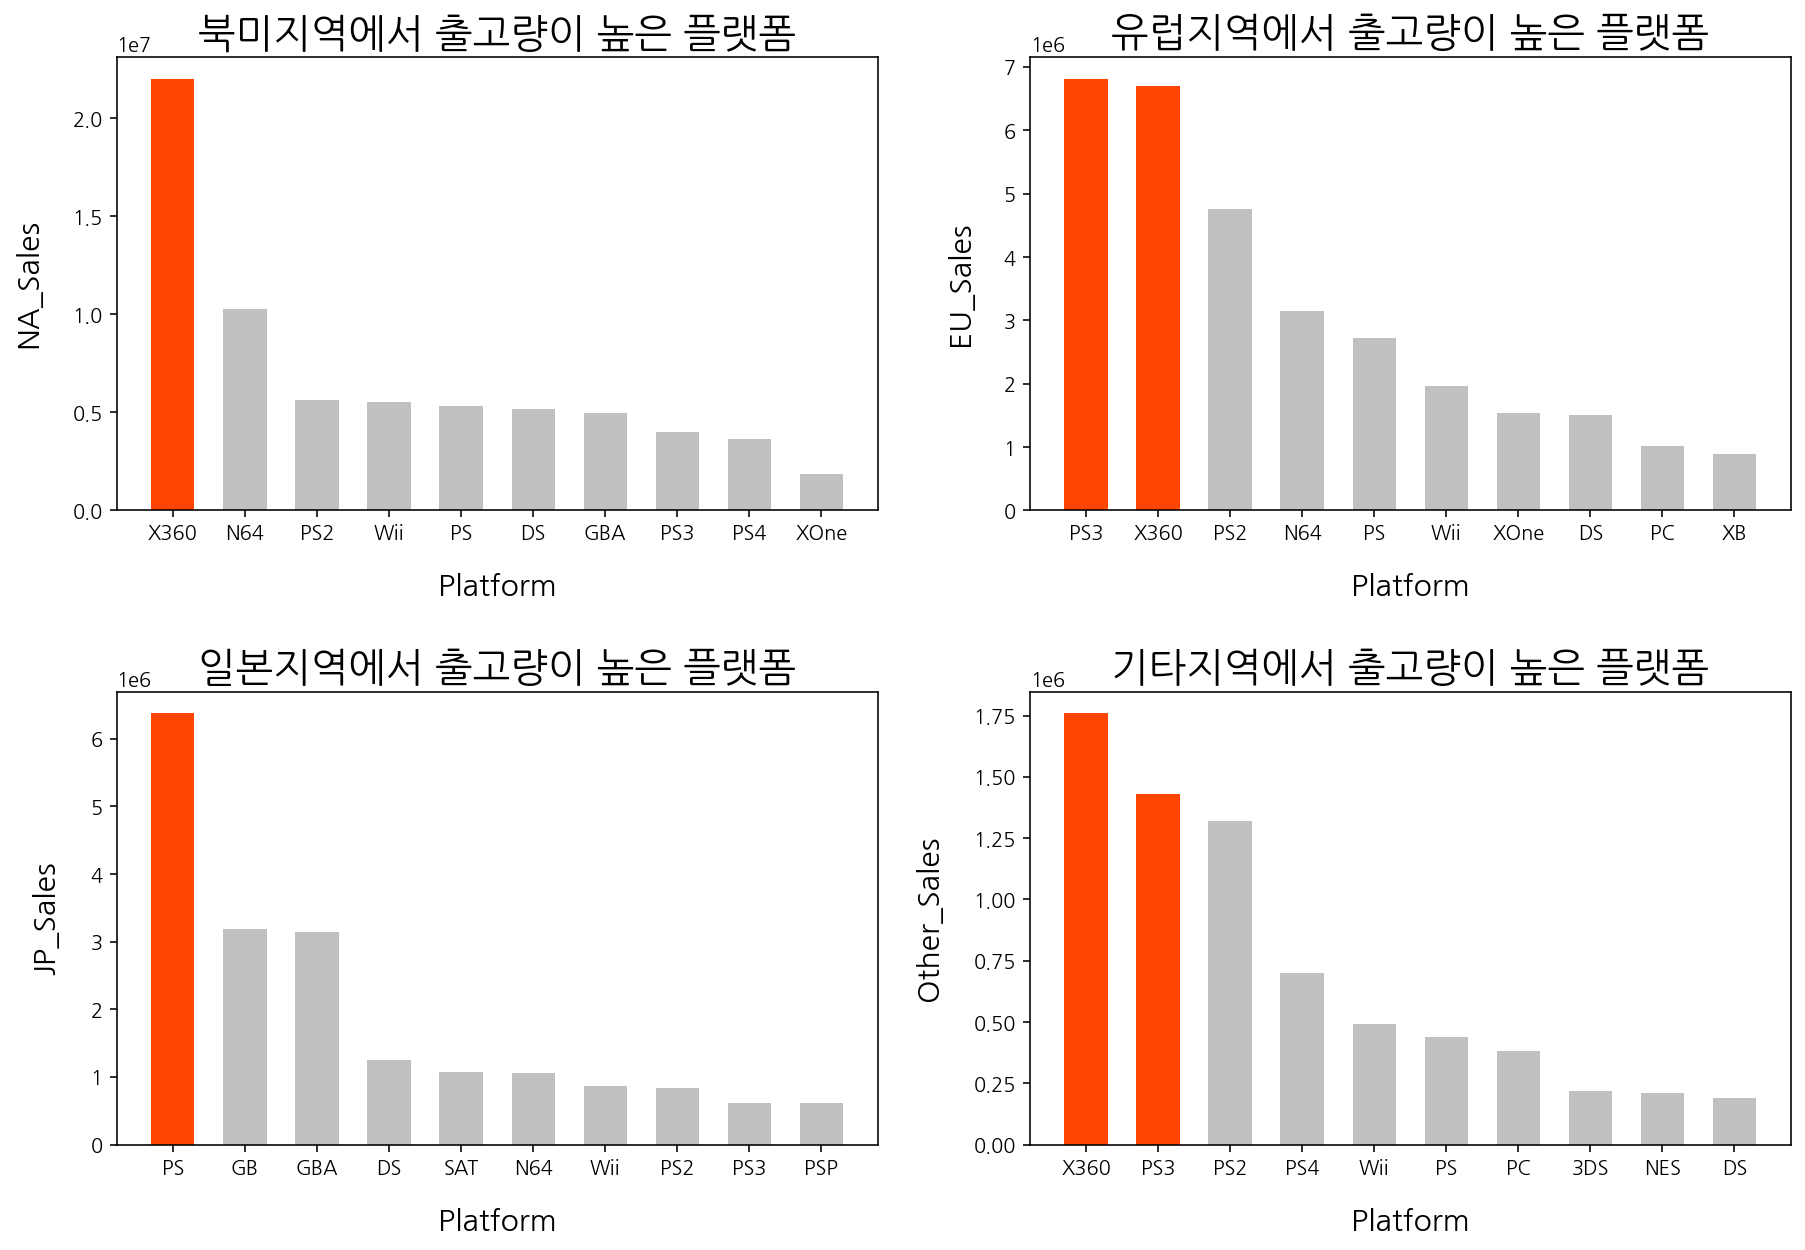

In [78]:
plt.figure(figsize=(15,10)) #그래프 크기 지정

plt.subplot(221)
xs = df_p10_NA['Platform'].to_list() #x축이 될 'Platform'을 리스트로 저장
ys = df_p10_NA['NA_Sales'].to_list() #y축이 될 'NA_Sales'를 리스트로 저장
#plt.figure(figsize=(10, 6)) #그래프 크기 지정
plt.xlabel('Platform', labelpad=15, fontsize=15) #그래프 x축 이름(label) 지정
plt.ylabel('NA_Sales', labelpad=15, fontsize=15) #그래프 y축 이름(label) 지정
#plt.barh(xs, ys, color='skyblue') #리스트로 저장한 xs와 ys로 막대(barh) 그래프 플롯
plt.bar(xs, ys, width=0.6, color=['orangered', 'silver', 'silver','silver','silver','silver','silver','silver','silver','silver'])
#plt.xticks(rotation=90, fontsize=14)
plt.title('북미지역에서 출고량이 높은 플랫폼', fontsize=20)

plt.subplot(222)
xs = df_p10_EU['Platform'].to_list() #x축이 될 'Platform'을 리스트로 저장
ys = df_p10_EU['EU_Sales'].to_list() #y축이 될 'NA_Sales'를 리스트로 저장
#plt.figure(figsize=(10, 6)) #그래프 크기 지정
plt.xlabel('Platform', labelpad=15, fontsize=15) #그래프 x축 이름(label) 지정
plt.ylabel('EU_Sales', labelpad=15, fontsize=15) #그래프 y축 이름(label) 지정
#plt.barh(xs, ys, color='skyblue') #리스트로 저장한 xs와 ys로 막대(barh) 그래프 플롯
plt.bar(xs, ys, width=0.6, color=['orangered', 'orangered', 'silver','silver','silver','silver','silver','silver','silver','silver'])
#plt.xticks(rotation=90, fontsize=14)
plt.title('유럽지역에서 출고량이 높은 플랫폼', fontsize=20)

plt.subplot(223)
xs = df_p10_JP['Platform'].to_list() #x축이 될 'Platform'을 리스트로 저장
ys = df_p10_JP['JP_Sales'].to_list() #y축이 될 'NA_Sales'를 리스트로 저장
#plt.figure(figsize=(10, 6)) #그래프 크기 지정
plt.xlabel('Platform', labelpad=15, fontsize=15) #그래프 x축 이름(label) 지정
plt.ylabel('JP_Sales', labelpad=15, fontsize=15) #그래프 y축 이름(label) 지정
#plt.barh(xs, ys, color='skyblue') #리스트로 저장한 xs와 ys로 막대(barh) 그래프 플롯
plt.bar(xs, ys, width=0.6, color=['orangered', 'silver', 'silver','silver','silver','silver','silver','silver','silver','silver'])
#plt.xticks(rotation=90, fontsize=14)
plt.title('일본지역에서 출고량이 높은 플랫폼', fontsize=20)

plt.subplot(224)
xs = df_p10_Other['Platform'].to_list() #x축이 될 'Platform'을 리스트로 저장
ys = df_p10_Other['Other_Sales'].to_list() #y축이 될 'NA_Sales'를 리스트로 저장
#plt.figure(figsize=(10, 6)) #그래프 크기 지정
plt.xlabel('Platform', labelpad=15, fontsize=15) #그래프 x축 이름(label) 지정
plt.ylabel('Other_Sales', labelpad=15, fontsize=15) #그래프 y축 이름(label) 지정
#plt.barh(xs, ys, color='skyblue') #리스트로 저장한 xs와 ys로 막대(barh) 그래프 플롯
plt.bar(xs, ys, width=0.6, color=['orangered', 'orangered', 'silver','silver','silver','silver','silver','silver','silver','silver'])
#plt.xticks(rotation=90, fontsize=14)
plt.title('기타지역에서 출고량이 높은 플랫폼', fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4) #격자 여백 설정
plt.show()

## 가설검정

In [23]:
df_category = df.loc[:,['Platform', 'Genre', 'Publisher']]
df_category['Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [24]:
df_category['PlatformCategory'] = df_category.Platform.astype('category') #문자열 데이터를 카테고리형 데이터로 바꾸기
df_category['GenreCategory'] = df_category.Genre.astype('category')
df_category['PublisherCategory'] = df_category.Publisher.astype('category')

df_category['PlatformCategory'] = pd.factorize(df_category.PlatformCategory)[0] # factorize를 이용하여 정수형으로 변경 
df_category['GenreCategory'] = pd.factorize(df_category.GenreCategory)[0]
df_category['PublisherCategory'] = pd.factorize(df_category.PublisherCategory)[0]

df_category = df_category.loc[:,['PlatformCategory', 'GenreCategory', 'PublisherCategory']]
df_category.head()


,PlatformCategory,GenreCategory,PublisherCategory
0,0,0,0
1,1,0,1
2,2,1,2
3,0,2,3
4,3,3,4


Q1. 4개 지역의 출고량의 평균에 차이가 있는가?
- H0: 4개 지역의 출고량의 평균에 차이가 없다.
- H1: 4개 지역의 출고량의 평균에 유의미한 차이가 있다.

In [25]:
#One-way ANOVA
g1 = np.array(df['NA_Sales'])
g2 = np.array(df['EU_Sales'])
g3 = np.array(df['JP_Sales'])
g4 = np.array(df['Other_Sales'])

from scipy.stats import f_oneway
f_oneway(g1,g2,g3,g4)

F_onewayResult(statistic=10.943177994444007, pvalue=3.5121344358183575e-07)

-> p-value가 0.0000003512로 0.05보다 훨씬 작기 때문에 귀무가설은 기각 된다.
-> 즉, 4개 지역의 평균에는 유의미한 차이가 있다.

In [26]:
df_category.head()

,PlatformCategory,GenreCategory,PublisherCategory
0,0,0,0
1,1,0,1
2,2,1,2
3,0,2,3
4,3,3,4


Q2. 플랫폼과 장르는 연관이 있는가?
- H0: 플랫폼과 장르는 연관이 없다.
- H1: 플랫폼과 장르는 연관이 있다.

In [27]:
from scipy.stats import chi2_contingency

obs1 = pd.crosstab(df_category['PlatformCategory'], df_category['GenreCategory'])
chi2_contingency(obs1, correction=False)[1]

0.0

-> 게임이 출시되는 플랫폼과 게임의 장르는 연관이 있다.

Q3. 플랫폼과 회사는 연관이 있는가?
- H0: 플랫폼과 회사는 연관이 없다.
- H1: 플랫폼과 회사는 연관이 있다.

In [28]:
obs2 = pd.crosstab(df_category['PlatformCategory'], df_category['PublisherCategory'])
chi2_contingency(obs2, correction=False)[1]

0.0

-> 게임이 출시되는 플랫폼과 게임을 출시하는 회사는 연관이 있다.

Q4. 장르와 회사는 연관이 있는가?
- H0: 장르와 회사는 연관이 없다.
- H1: 장르와 회사는 연관이 있다.

In [29]:
obs3 = pd.crosstab(df_category['GenreCategory'], df_category['PublisherCategory'])
chi2_contingency(obs3, correction=False)[1]

0.0

-> 게임의 장르와 게임을 출시하는 회사는 연관이 있다.

## 결론

### 우리 회사는 다음 분기에 아래와 같은 게임을 출시하는 것이 매출에 도움이 될 것이다.

- 플랫폼: X360, PS4
- 장르: Action